# Portafolios de Inversión
## Repaso Práctico
José Armando Melchor Soto

---





# INDICACIONES

### Parte 1: Análisis individual de activos financieros (60%)

### Activos a analizar:

- **MSFT (Microsoft)**
- **TSLA (Tesla)**
- **JNJ (Johnson & Johnson)**

---

### 1. Investigación inicial (20%)

a. ¿A qué se dedica cada una de las compañías?  
b. ¿En qué sector económico y subsector se encuentran?  
c. ¿Cuál consideras que tiene una posición más estable en el mercado? Justifica.

---

### 2. Análisis de rendimientos diarios (20%)

a. Descarga los precios de **cierre ajustado diario** desde el **2019-01-01 hasta 2025-05-31** para los tres activos.  

b. Calcula los **rendimientos diarios** para cada uno.  

c. Grafica la **distribución de los rendimientos diarios** usando histogramas con densidad (gráficas separadas para cada activo).  

---

### 3. Rendimiento y riesgo anual (20%)

a. Calcula el **rendimiento promedio anual** para cada activo.  
b. Calcula la **varianza anual** y la **volatilidad anual**.  
c. Interpreta:
   - ¿Qué activo ofrece mayor rendimiento?
   - ¿Qué activo implica más riesgo?
   - Si tuvieras que invertir en uno solo, ¿cuál elegirías y por qué?

---

### Parte 2: Asimetría y análisis complementario (20%)

### 4. Análisis de asimetría

a. Calcula el coeficiente de **asimetría (skewness)** de los rendimientos diarios de cada activo.  
b. Interpreta:
   - ¿Qué tipo de sesgo presenta cada distribución?
   - ¿Alguno tiene mayor riesgo de caídas abruptas?
   - ¿Cambian tus conclusiones sobre cuál es el mejor activo?

---

### Parte 3: Portafolio y diversificación (20%)

### 5. Portafolio con ponderaciones iguales

a. Construye un portafolio con los tres activos en partes iguales.  

b. Calcula:
- Rendimiento diario y anual del portafolio  
- Varianza diaria y anual  
- Volatilidad diaria y anual  

c. Calcula la **matriz de correlación** entre los activos.  

d. Interpreta:
- ¿Qué pares están más correlacionados?
- ¿Cuál activo aporta más a la diversificación?
- ¿Qué activos contribuyen más al riesgo no sistemático?

---

---

In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  3 of 3 completed


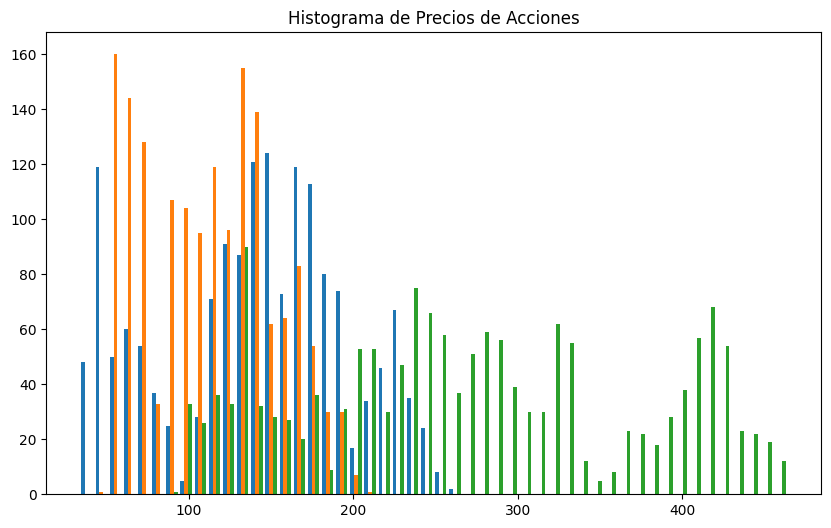

In [ ]:
prices = yf.download(['MSFT', 'AAPL', 'GOOGL'], start='2019-01-01', end= '2025-05-31')['Close']
prices

plt.figure(figsize=(10, 6))
plt.hist(prices, bins=50, label='Precios')
plt.title('Histograma de Precios de Acciones')
plt.show()

### 2. Análisis de Rendimientos Diarios

In [52]:
ret = prices.pct_change().dropna()
ret.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2019-01-03,-0.099607,-0.027696,-0.036788
2019-01-04,0.042689,0.051294,0.046509
2019-01-07,-0.002226,-0.001994,0.001276
2019-01-08,0.019063,0.008783,0.007250
2019-01-09,0.016982,-0.003427,0.014300


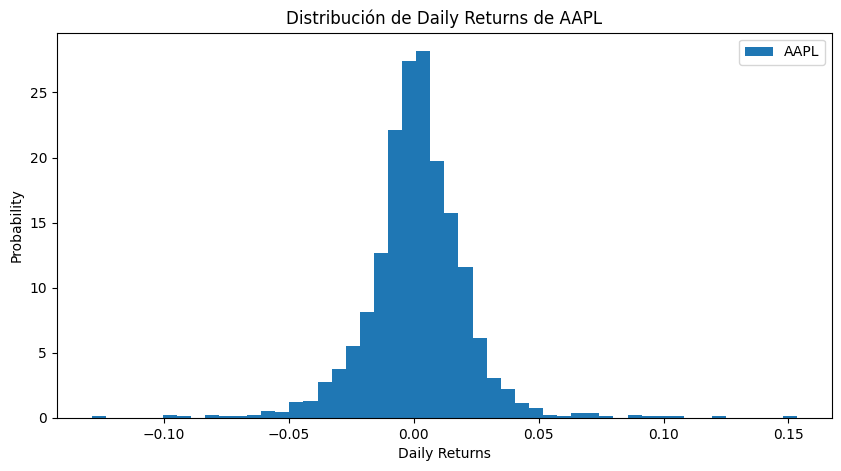

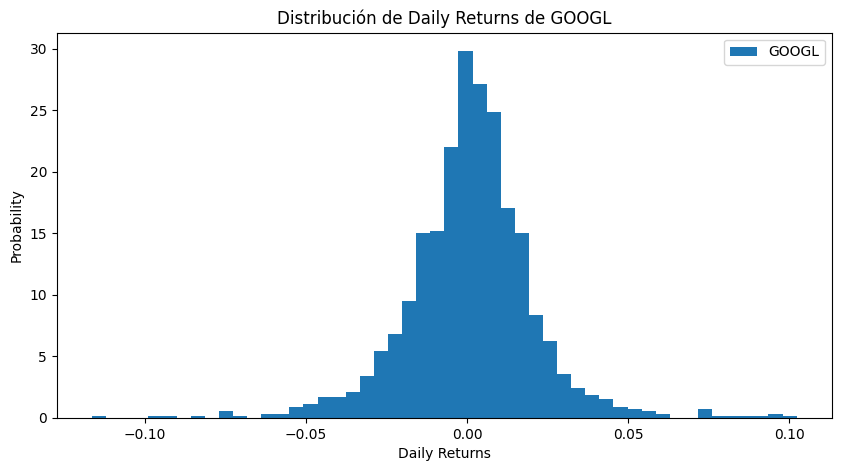

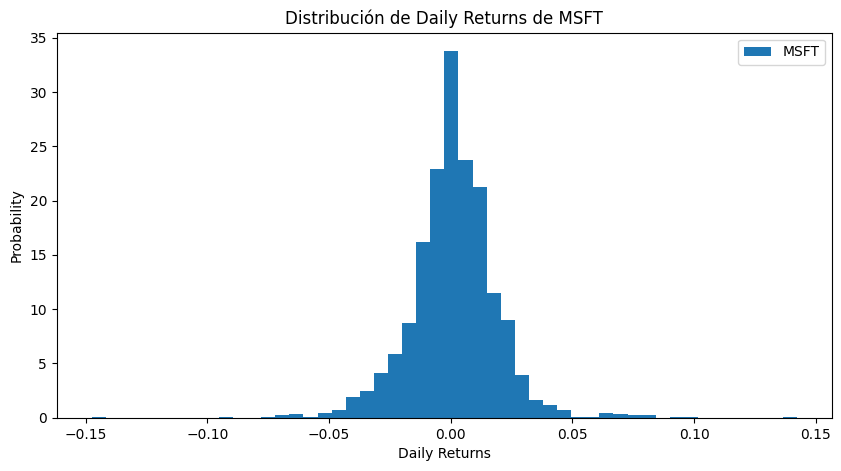

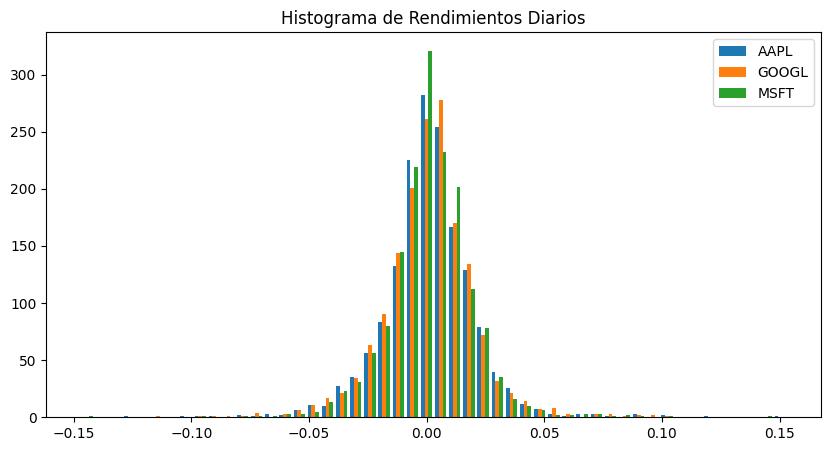

In [51]:
for stock in ret.keys():
    plt.figure(figsize=(10, 5))
    plt.hist(ret[stock],label=stock, density=True, bins=50)
    plt.title(f'Distribución de Daily Returns de {stock}')
    plt.xlabel('Daily Returns')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()


plt.figure(figsize=(10, 5))
plt.hist(ret, bins=50, label=ret.keys())
plt.title('Histograma de Rendimientos Diarios')
plt.legend()
plt.show()


#### 3. Rendimiento y Riesgo Anual

##### Rendimiento Promedio Anual

In [105]:
ret_anual = ret.mean() * 252
ret_anual.head()*100

Ticker
AAPL     31.276990
GOOGL    23.553490
MSFT     28.964524
dtype: float64

##### Varianza Anual


In [ ]:
var = ret.var() * np.sqrt(252)
var

Ticker
AAPL     0.006390
GOOGL    0.006302
MSFT     0.005369
dtype: float64

##### Volatilidad / riesgo anual

In [95]:
vol = ret.std() * np.sqrt(252)
vol*100

Ticker
AAPL     31.850002
GOOGL    31.628382
MSFT     29.195530
dtype: float64

### Asimetría 

In [111]:
Skew = ret.skew()
Skew

Ticker
AAPL     0.160857
GOOGL   -0.033049
MSFT     0.075765
dtype: float64

El que mejor asimetría tiene es el de `APPL` , ya que va de la mano por tener mejor rendimiento anual, por lo que tiende a que puedan haber más ganancias, también cabe mencionar que `MSFT` también tiene una asimetría positiva , por lo que también pueda significar que tiende a que haya más ganancias, por lo tanto , esas dos son los mejores activos a cuanto asimetría. `GOOGL` tiende levemente a las perdidas, por lo que pudiera sumar a la conclusión anterior, ya que se repite el patrón de que es una acción que para el cliente pudiera ser menos atractiva que las otras dos.

#### Interpretación

Se tiene que con estos 3 activos financieros , el que mejor rendimiento anual tiene es el de `AAPL`, por lo que se primera vista es muy atractivo , ya que tiene un rendimiento esperado del 31.27%, pero si seguimos analizando los siguientes datos podemos darnos cuenta que tiene una gran volatilidad con un 31.85% de riesgo, por lo que resulta menos atractivo al momento de escoger esta acción. Considero que la peor acción de este portafolio es la de `GOOG` ya que tiene muy poco rendimiento y un gran riesgo , por lo que es la menos atractiva del portafolio. `MSFT` y `APPL` están con un buen rendimiento y con una volatilidad un poco equilibrado, por lo que sería una muy buena opción para nuestro portafolio, unicamente basandonos en estos calculos.

---

#### Portafolio y Diversificación 

#### a) Portafolio con Ponderaciones iguales 

In [167]:
w = np.array([0.25,0.25,0.25,0.25])
np.sum(w)

1.0

In [168]:
prices= yf.download(['TSLA', 'KR', 'BAC', 'V'], start='2019-01-01', end= '2025-05-31')['Close']
prices

[*********************100%***********************]  4 of 4 completed


Ticker,BAC,KR,TSLA,V
Date,,,,
2019-01-02,21.290710,23.719423,20.674667,127.063858
2019-01-03,20.949516,23.762863,20.024000,122.484924
2019-01-04,21.819574,24.032207,21.179333,127.761696
2019-01-07,21.802509,24.258108,22.330667,130.065552
2019-01-08,21.759859,24.727282,22.356667,130.772903
...,...,...,...,...
2025-05-23,42.946915,68.589996,339.339996,353.540009
2025-05-27,43.960938,67.830002,362.890015,359.299988
2025-05-28,43.801876,67.690002,356.899994,359.730011


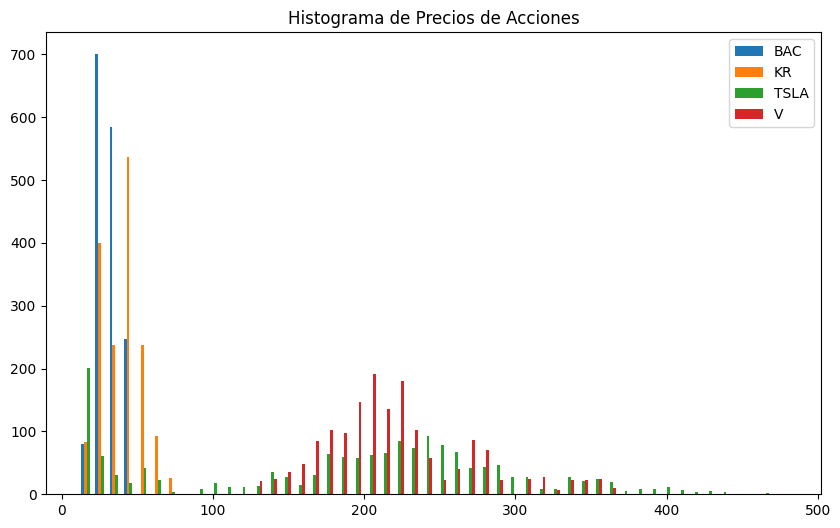

In [169]:
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=50, label=prices.keys())
plt.title('Histograma de Precios de Acciones') 
plt.legend()
plt.show()

#### Rendimiento diario 

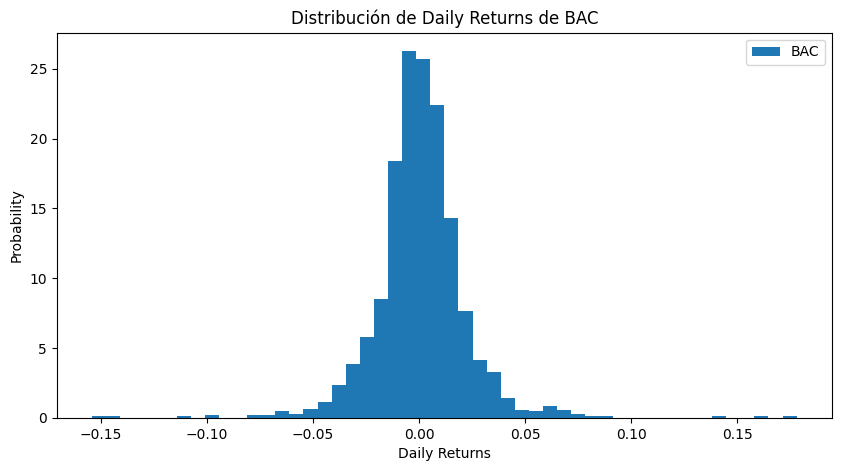

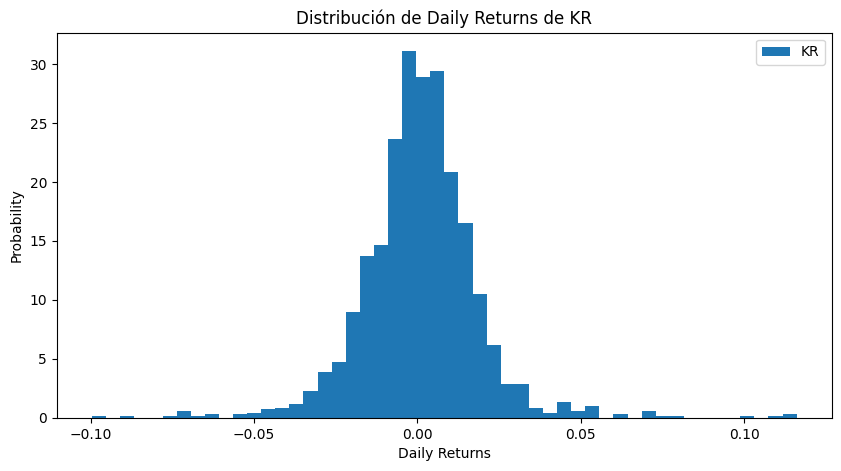

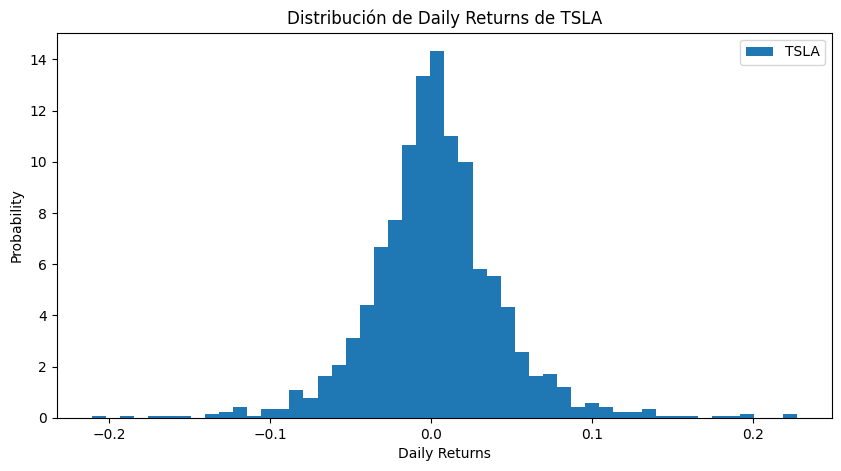

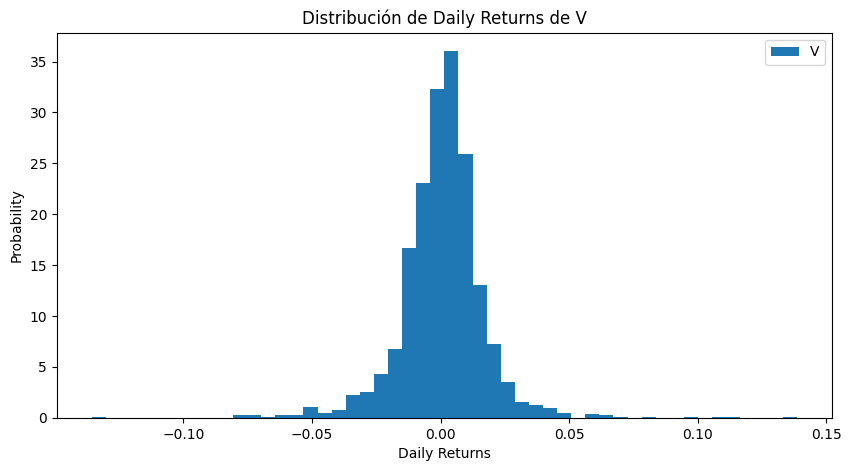

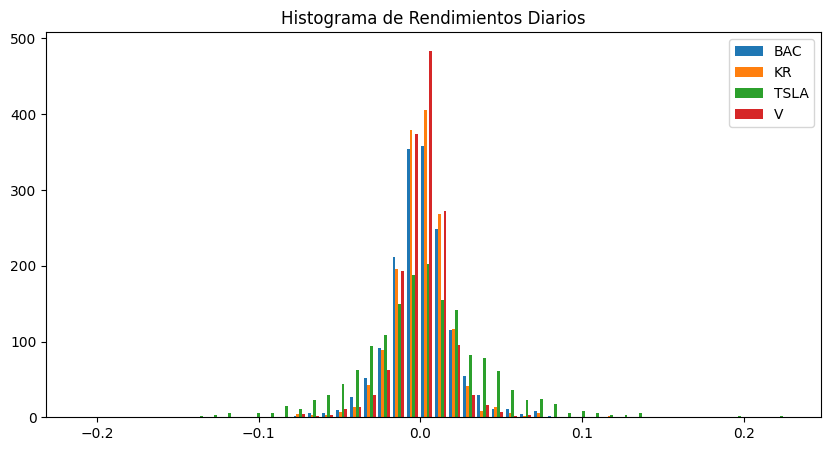

In [175]:
ret = prices.pct_change().dropna()

for stock in ret.keys():
    plt.figure(figsize=(10, 5))
    plt.hist(ret[stock], label=stock, density=True, bins=50)
    plt.title(f'Distribución de Daily Returns de {stock}')
    plt.xlabel('Daily Returns')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

plt.figure(figsize=(10, 5))
plt.hist(ret, bins=50, label=ret.keys())
plt.title('Histograma de Rendimientos Diarios') 
plt.legend()
plt.show()

#### Rendimiento Anual

In [177]:
mean = ret.mean() * 252
ret= (mean*w).sum()
ret*100

30.752959906262156

##### Covarianza

In [182]:
ret = prices.pct_change().dropna()
cov = ret.cov()

##### Varianza diaria

In [195]:
var = w.T @ cov @ w
var*100

0.02736593390783046

##### Varianza Anual

In [196]:
var_anual = var*np.sqrt(252)
var_anual*100

0.43442073309089624

##### Volatilidad diaria 

In [207]:
vol = np.sqrt(var)
vol*100

1.65426521174298

##### Volatilidad anual 

In [202]:
vol_anual = vol * np.sqrt(252)
vol_anual *100

26.260646116905196

In [214]:
vol2 = ret.std()
vol2

Ticker
BAC     0.021435
KR      0.017765
TSLA    0.041216
V       0.016666
dtype: float64

##### Matriz de correlación

In [204]:
corr = ret.corr()
corr

Ticker,BAC,KR,TSLA,V
Ticker,,,,
BAC,1.000000,0.116857,0.301636,0.588939
KR,0.116857,1.000000,0.026251,0.074348
TSLA,0.301636,0.026251,1.000000,0.365250
V,0.588939,0.074348,0.365250,1.000000


In [205]:
sum_corr = 0.116857+0.301636+0.588939+0.026251+0.074348+0.365250
sum_corr

1.4732810000000003

#### Interpretación 

Con este portafolio con 4 activos ponderadas al mismo peso del 25% cada una , se puedo analizar que se tiene un muy buen rendimiento diario/anual, ya que tiene un rendimiento promedio de 30.7530% , pero con un riesgo un poco  alto , debido a que la empresa `TSLA` aumenta demasiado este valor en cuanto a su volatilidad, pero para una persona que es un neutra al riesgo , se puede decir que esta opción de portafolio le llamaría la atención por el cierto equilibrio que hay entre el rendimiento / volatilidad. Además , se puede notar que en la matriz de correlación está muy correlacionada unos activos a los otros , por lo que puede ser bueno , si lo que quiere el cliente es no diversificar y meter su dinero en activos de un sector economico similar,esta sería una muy buena opción. 